In [337]:
import keras
import numpy as np

import matplotlib.pyplot as plt
from sklearn import datasets
import mnist
from itertools import permutations

In [309]:
def build_model(input_shape, n_layers, kernel_size=3):
    filter_sizes = [2 ** i for i in range(n_layers + 1)]
    print(filter_sizes)
    
    inputs = keras.layers.Input(shape=(input_shape, input_shape, 1))
    
    # Convolution
    x = inputs
    for f in filter_sizes[1:-1]:
        x = keras.layers.Conv2D(f, kernel_size=kernel_size, padding="same", data_format="channels_last")(x)
        x = keras.layers.MaxPool2D(pool_size=2, )(x)
       
    # Intermediate conv/deconv
    x = keras.layers.Conv2D(filter_sizes[-1], kernel_size=kernel_size, padding="same", data_format="channels_last")(x)
    x = keras.layers.Deconv2D(filter_sizes[-2], kernel_size=kernel_size, padding="same")(x)
    
    # Deconv
    for f in filter_sizes[-3::-1]:
        x = keras.layers.UpSampling2D(size=2, data_format="channels_last")(x)
        x = keras.layers.Deconv2D(f, kernel_size=kernel_size, padding="same", data_format="channels_last")(x)
    

    outputs = keras.layers.Dense(1, activation="sigmoid")(x)
    outputs = x

    return keras.models.Model(inputs=inputs, outputs=outputs)

In [346]:
# For images in format (px_row, px_col, im_row, im_col)
def display_images(images):
    dims = images.shape
    
    fig = plt.figure()
    for i in range(dims[2]):
        for j in range(dims[3]):
            fig.add_subplot(dims[2], dims[3], i * dims[3] + j + 1)
            plt.imshow(images[:,:,i,j])
        
    
    

---

In [235]:
digits = mnist.train_images()
img_width = digits.shape[1]
data = np.reshape(digits, (-1, img_width, img_width, 1))

In [310]:
m = build_model(data.shape[1], 2)

[1, 2, 4]


In [311]:
m.compile(optimizer="adam", loss="mse", metrics=["accuracy"])

In [312]:
m.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_36 (InputLayer)        (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_103 (Conv2D)          (None, 28, 28, 2)         20        
_________________________________________________________________
max_pooling2d_60 (MaxPooling (None, 14, 14, 2)         0         
_________________________________________________________________
conv2d_104 (Conv2D)          (None, 14, 14, 4)         76        
_________________________________________________________________
conv2d_transpose_64 (Conv2DT (None, 14, 14, 2)         74        
_________________________________________________________________
up_sampling2d_42 (UpSampling (None, 28, 28, 2)         0         
_________________________________________________________________
conv2d_transpose_65 (Conv2DT (None, 28, 28, 1)         19        
Total para

In [313]:
m.fit(data[:1000], data[:1000], epochs=10)

Epoch 1/10
1000/1000 [==============================] - 1s 1ms/step - loss: 4929.2961 - acc: 0.1732
Epoch 2/10
1000/1000 [==============================] - 0s 452us/step - loss: 2773.4480 - acc: 0.1672
Epoch 3/10
1000/1000 [==============================] - 0s 450us/step - loss: 2138.2061 - acc: 0.1734
Epoch 4/10
1000/1000 [==============================] - 0s 450us/step - loss: 1816.2130 - acc: 0.1782
Epoch 5/10
1000/1000 [==============================] - 0s 450us/step - loss: 1585.2473 - acc: 0.1827
Epoch 6/10
1000/1000 [==============================] - 0s 450us/step - loss: 1406.6883 - acc: 0.1852
Epoch 7/10
1000/1000 [==============================] - 0s 459us/step - loss: 1276.0639 - acc: 0.1870
Epoch 8/10
1000/1000 [==============================] - 0s 471us/step - loss: 1184.0510 - acc: 0.1878
Epoch 9/10
1000/1000 [==============================] - 0s 448us/step - loss: 1114.8570 - acc: 0.1883
Epoch 10/10
1000/1000 [==============================] - 0s 456us/step - loss: 1059.

In [123]:
m.predict(data[0:1,])

array([[[[0.29662204],
         [0.49888924],
         [0.38611913],
         [0.39763016],
         [0.33414683],
         [0.4433639 ],
         [0.25875688],
         [0.37537253],
         [0.2800975 ],
         [0.30345958],
         [0.281769  ],
         [0.41610926],
         [0.50056297],
         [0.41695967],
         [0.42310295],
         [0.48770422]],

        [[0.47483802],
         [0.40165296],
         [0.24849257],
         [0.27775642],
         [0.2952069 ],
         [0.279701  ],
         [0.2565205 ],
         [0.31139967],
         [0.41285837],
         [0.26894546],
         [0.42226335],
         [0.45314327],
         [0.34328222],
         [0.4637191 ],
         [0.37127203],
         [0.25763148]],

        [[0.4028988 ],
         [0.266316  ],
         [0.33882278],
         [0.43309036],
         [0.41649053],
         [0.46052963],
         [0.4331315 ],
         [0.4052495 ],
         [0.32462746],
         [0.3739755 ],
         [0.45089763],
       

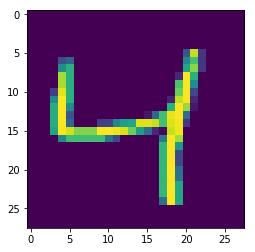

In [314]:
plt.imshow(np.reshape(data[2:3,], (28, 28)))

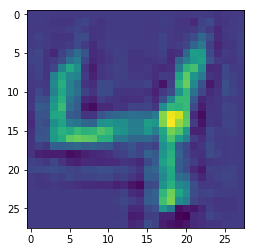

In [315]:
plt.imshow(np.reshape(m.predict(data[2:3,]), (28, 28)))

In [322]:
m.layers[3].get_weights()[0].shape

(3, 3, 2, 4)

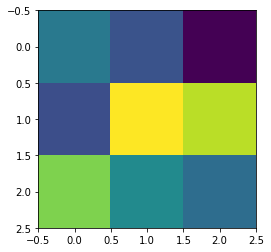

In [333]:
plt.imshow(m.layers[3].get_weights()[0][:,:,0,0])
# np.reshape(m.layers[1].get_weights()[0], (3,3,2))[:,:,0]
# plt.imshow(np.reshape(m.layers[1].get_weights()[0], (3,3,2))[:,:,0])

In [302]:
m.layers[1].get_weights()[0].shape

(3, 3, 1, 2)

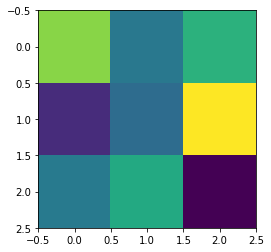

In [334]:
plt.imshow(m.layers[1].get_weights()[0][:,:,0,0])
# np.reshape(m.layers[1].get_weights()[0], (3,3,2))[:,:,0]
# plt.imshow(np.reshape(m.layers[1].get_weights()[0], (3,3,2))[:,:,0])

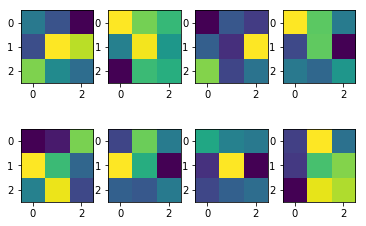

In [347]:
display_images(m.layers[3].get_weights()[0])

In [345]:
m.layers[3].get_weights()[0].shape

(3, 3, 2, 4)